In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0

try:
  %tensorflow_version 2.x  # Colab only
except Exception:
  pass

import tensorflow as tf
from typing_extensions import Concatenate
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [5]:
vgg = tf.keras.applications.VGG16(
    input_shape=[100, 100, 3], include_top=False, weights='imagenet')

In [6]:
x = Flatten()(vgg.output)
x = Dense(4, activation='sigmoid')(x)
model = Model(vgg.input, x)

In [7]:
def image_generator(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros((batch_size, 100, 100, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        # make the boxes and store their location in target
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        X[i,row0:row1,col0:col1,:] = 1
        Y[i,0] = row0/100.
        Y[i,1] = col0/100.
        Y[i,2] = (row1 - row0)/100.
        Y[i,3] = (col1 - col0)/100.

      yield X, Y

In [8]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

In [9]:
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=10,
)

Epoch 1/10
50/50 [==============================] - 20s 173ms/step - loss: 1.0812
Epoch 2/10
50/50 [==============================] - 9s 174ms/step - loss: 0.5179
Epoch 3/10
50/50 [==============================] - 9s 176ms/step - loss: 0.5067
Epoch 4/10
50/50 [==============================] - 9s 177ms/step - loss: 0.5076
Epoch 5/10
50/50 [==============================] - 9s 179ms/step - loss: 0.5061
Epoch 6/10
50/50 [==============================] - 9s 181ms/step - loss: 0.5084
Epoch 7/10
50/50 [==============================] - 9s 180ms/step - loss: 0.5045
Epoch 8/10
50/50 [==============================] - 9s 178ms/step - loss: 0.5060
Epoch 9/10
50/50 [==============================] - 9s 177ms/step - loss: 0.5038
Epoch 10/10
50/50 [==============================] - 9s 176ms/step - loss: 0.5055


In [10]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction():
  # Generate a random image
  x = np.zeros((100, 100, 3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)
  x[row0:row1,col0:col1,:] = 1
  print(row0, col0, row1, col1)

  # Predict
  X = np.expand_dims(x, 0)
  p = model.predict(X)[0]

  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100),
      p[3]*100, p[2]*100,linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()

21 72 52 89
1/1 [==============================] - 1s 520ms/step


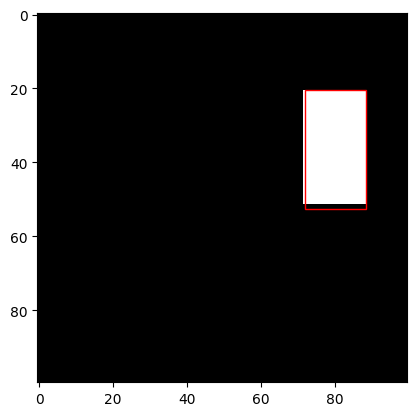

In [11]:
make_prediction()